# Calculating effective coarse graining scales of SSH maps
As defined in Martin et al. (2024) https://doi.org/10.31223/X5W676

In [1]:
from glob import glob
import numpy as np
import os
# import pyfftw

In [1]:
!export LD_LIBRARY_PATH=/dat1/Miniconda/smart1n/mini3/lib:$LD_LIBRARY_PATH

In [ ]:
# !pip install joblib
# !pip install pyfftw

In [2]:
!which python

/usr/local/anaconda3/bin/python


In [2]:
import sys
sys.path.append('..')
from src.mod_plot import *
from src.mod_stat import *
from src.mod_spectral import *
# from src.mod_coarsegrain import *

In [ ]:
help(compute_effective_coarse_graining_scale)

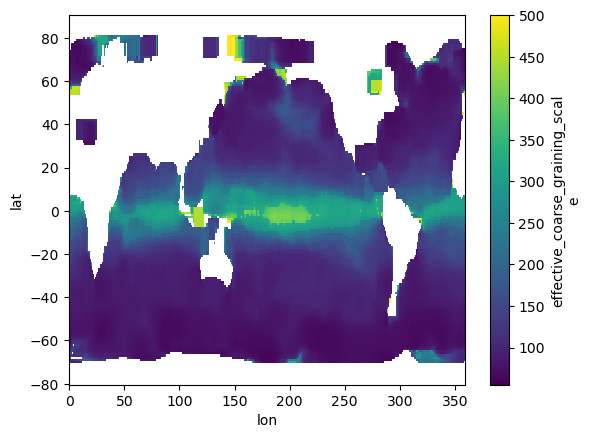

In [22]:
ds = xr.open_dataset('/dat1/smart1n/aviso-data/global training data/2023a_SSH_mapping_OSE/results/psd_sla_simvp_ssh_sst_1M_global_6sat_w_coarsegrain.nc')#.sel(lon=slice(150,160))
ds['effective_coarse_graining_scale'].plot()

NameError: name 'fit_function' is not defined

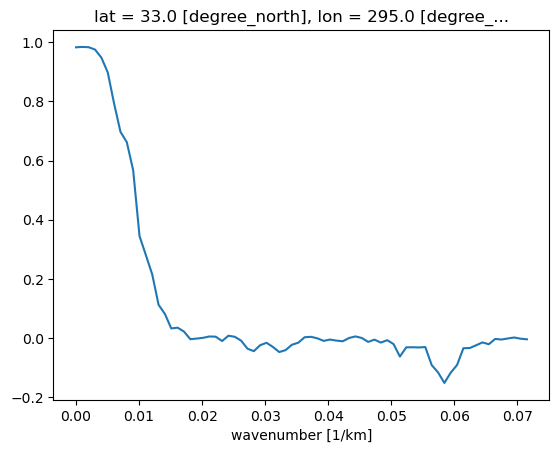

In [5]:
(1-ds['psd_diff']/ds['psd_ref']).isel(lat=0,lon=0).plot()
plt.plot(ds['wavenumber'],fit_function(ds['wavenumber'],100*2*np.pi))

In [7]:
lon = np.ma.masked_invalid(ds['lon'].values)
lat = np.ma.masked_invalid(ds['lat'].values)
wavenumber = np.ma.masked_invalid(ds['wavenumber'].values)
psd_diff = np.ma.masked_invalid(ds['psd_diff'].values)
psd_ref = np.ma.masked_invalid(ds['psd_ref'].values)

In [6]:
def fit_function(x, l):
    return f_tanh(x, l)


NameError: name 'wavenumber' is not defined

In [4]:
%%time
scales = compute_effective_coarse_graining_scale(lon, lat, wavenumber, psd_diff, psd_ref, num_workers = 20)
# scales = compute_effective_coarse_graining_scale(lon, lat, wavenumber, psd_diff, psd_ref, num_workers=10)

# %prun scales = compute_effective_coarse_graining_scale(lon, lat, wavenumber, psd_diff, psd_ref, num_workers = 10)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:   12.3s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:   13.8s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:   23.7s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:   32.2s
[Parallel(n_jobs=20)]: Done  73 tasks      | elapsed:   43.8s
[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed:   53.7s
[Parallel(n_jobs=20)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:  1.2min
[Parallel(n_jobs=20)]: Done 150 out of 171 | elapsed:  1.4min remaining:   11.4s
[Parallel(n_jobs=20)]: Done 168 out of 171 | elapsed:  1.6min remaining:    1.7s


CPU times: user 618 ms, sys: 424 ms, total: 1.04 s
Wall time: 1min 42s


[Parallel(n_jobs=20)]: Done 171 out of 171 | elapsed:  1.7min finished


In [5]:
scales = np.load('../scales.npy')

In [13]:
lat[80]

0.0

In [14]:
print(np.mean(scales[80,]))

315.4815578947409


In [17]:
scales.shape

(6,)

In [ ]:
%prun scales = compute_effective_coarse_graining_scale_single_lat([100, wavenumber, (1-psd_diff/psd_ref)[:,100,:],'tanh'])

In [9]:
eff_res = ds['effective_resolution'].values

In [10]:
scales_masked = scales.copy()
scales_masked[np.isnan(eff_res)] = np.nan

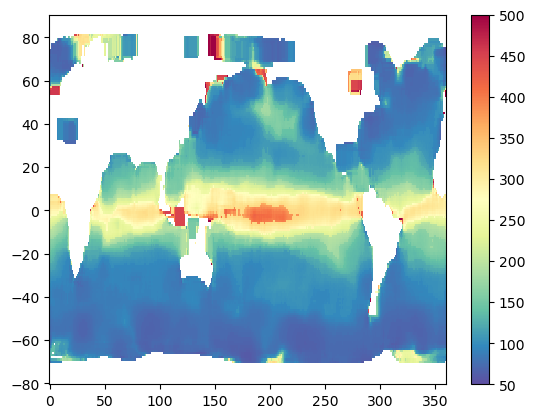

In [15]:
plt.pcolormesh(lon,lat,scales_masked,vmin=50, vmax=500, cmap = 'Spectral_r')
# plt.xlim([150,155])
# plt.ylim([25,30])
plt.colorbar()

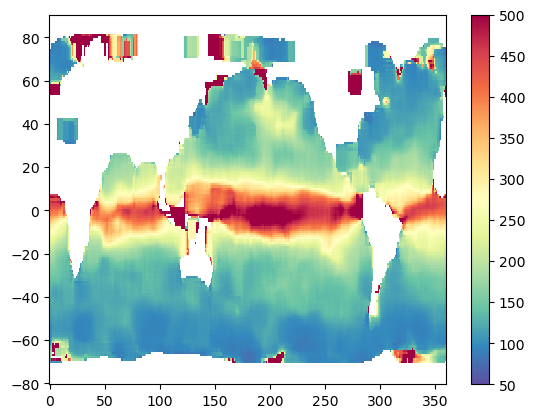

In [16]:
plt.pcolormesh(lon,lat,eff_res,vmin=50, vmax=500, cmap = 'Spectral_r')
# plt.xlim([150,155])
# plt.ylim([25,30])
plt.colorbar()

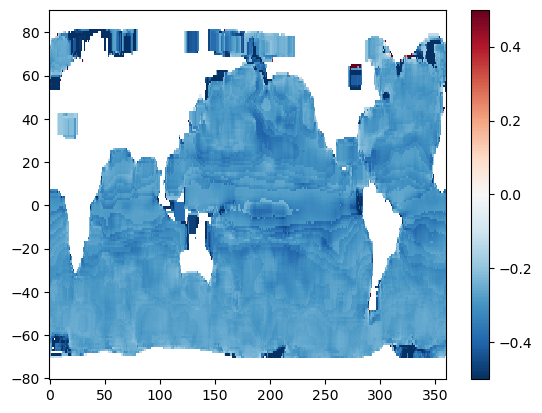

In [18]:
plt.pcolormesh(lon,lat,(scales_masked-eff_res)/eff_res,vmin=-0.5, vmax=0.5, cmap = 'RdBu_r')
# plt.xlim([150,155])
# plt.ylim([25,30])
plt.colorbar()

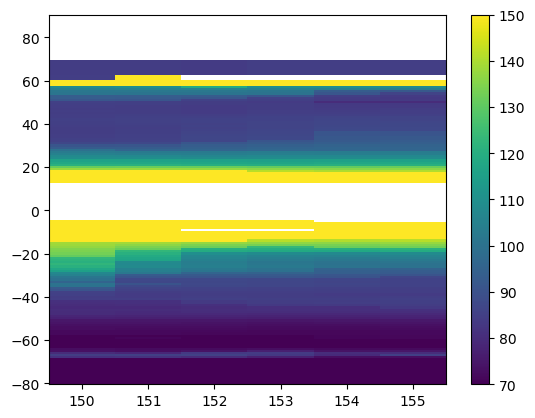

In [27]:
plt.pcolormesh(lon,lat,scales,vmin=70,vmax=150)
# plt.xlim([150,155])
# plt.ylim([25,30])
plt.colorbar()

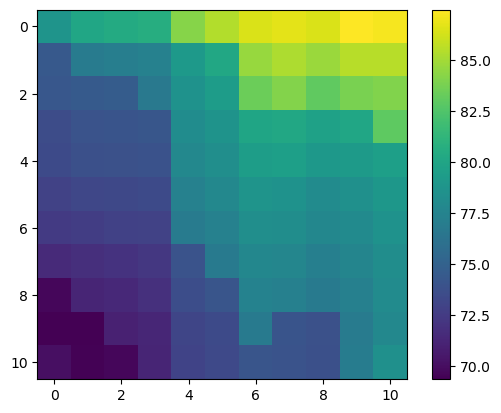

In [9]:
plt.imshow(scales)
plt.colorbar()

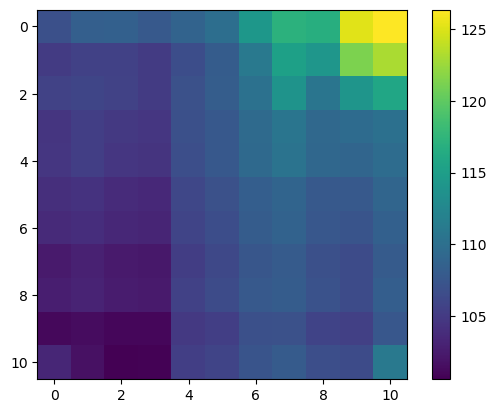

In [15]:
plt.imshow(ds['effective_resolution'].values)
plt.colorbar()